# Investiagating School Data

*Disclaimer: This project is based on the data cleaning walkthrough provided by dataquest.io. Though my own take on this project might differ from what can be found on their website.*

### The Project
In this project I will try to showcase my skills in data cleaning, data exploration and presentation. While I will perform some analyses on this project, they will remain at a lower level of complexity. If you want to see my performance on more complex issues, I would refer you to my other projects.

### The Question
In this project, I will try to investigate whether standardized testing in U.S. highschools is efficiant and if certain groups are at a disadvantage.  

### The Data
In order to answer said question, I am going to use publicly accessible SAT data from 2012 from the city of New York. In order to investigate demographics I need more data though. Here's a list of all datasets I am going to use:

* [SAT scores by school](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) - SAT scores for each high school in New York City
* [School attendance](https://data.cityofnewyork.us/Education/2010-2011-School-Attendance-and-Enrollment-Statist/7z8d-msnt) - Attendance information for each school in New York City
* [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - Information on class size for each school
* [AP test results](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e) - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
* [Graduation outcomes](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a) - The percentage of students who graduated, and other outcome information
* [Demographics](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j) - Demographic information for each school
* [School survey](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) - Surveys of parents, teachers, and students at each school










## Reading the Data

In [468]:
#read in the csv files
import pandas as pd
data_files = ["ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}
for f in data_files:
    d = pd.read_csv('data/{}'.format(f))
    key_name = f.replace('.csv', '')
    data[key_name] = d

In [469]:
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [470]:
for c in data:
    print(data[c].head())

      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K     

In [471]:
# reading in the survey files

all_survey = pd.read_csv('data/survey_all.txt', delimiter='\t', encoding='windows-1252')
d75_survey = pd.read_csv('data/survey_d75.txt', delimiter='\t', encoding='windows-1252')

In [472]:
survey = pd.concat([all_survey, d75_survey], axis=0)
survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most of the data displayed is not of interest for us. It seems the most interesting columns for us, according to the dictionary available at the source of the data are:

\["dbn", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"\]

We want to filter the data and also change the name of the column 'dbn' to 'DBN' to match our other datasets.


In [473]:
survey['DBN'] = survey['dbn']

In [474]:
survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11,DBN
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01M015
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01M019
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01M020
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01M034
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01M063


In [475]:
target_fields =[
"dbn", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"
]

data['survey'] = survey.loc[:, target_fields]


In [476]:
data['survey']

,dbn,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,75X352,90.0,58,48,38.0,46.0,160.0,8.9,8.3,7.9,...,5.7,5.8,6.8,6.0,7.8,7.6,7.4,6.6,7.1,7.2
52,75X721,84.0,90,48,237.0,82.0,239.0,8.6,7.6,7.5,...,6.7,7.0,7.8,7.2,7.8,7.9,8.0,7.1,7.3,7.6
53,75X723,77.0,74,20,103.0,69.0,74.0,8.4,7.8,7.8,...,6.7,7.6,6.7,7.2,7.7,7.7,7.6,7.4,7.4,7.7
54,75X754,63.0,93,22,336.0,82.0,124.0,8.3,7.5,7.5,...,6.6,7.1,6.8,6.6,7.6,7.7,7.2,6.9,7.3,7.5


## Insert DBN Fields

Almost all of our datasets contain the column 'DBN' so that is a great column to later merge the data on. Some datasets do not contain said field though, so I need to make up for that. Since DBN is just the padded CSD plus the School Code like in the 'class_size' dataset I can combine those two columns.

In [477]:
data['hs_directory']['DBN'] = data['hs_directory']['dbn']

# define function to create padded CSDs
def pad_csd(num):
    return str(num).zfill(2)
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)

In [478]:
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01


In [479]:
data["class_size"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CSD                                   27611 non-null  int64  
 1   BOROUGH                               27611 non-null  object 
 2   SCHOOL CODE                           27611 non-null  object 
 3   SCHOOL NAME                           27611 non-null  object 
 4   GRADE                                 26127 non-null  object 
 5   PROGRAM TYPE                          26127 non-null  object 
 6   CORE SUBJECT (MS CORE and 9-12 ONLY)  26127 non-null  object 
 7   CORE COURSE (MS CORE and 9-12 ONLY)   26127 non-null  object 
 8   SERVICE CATEGORY(K-9* ONLY)           26127 non-null  object 
 9   NUMBER OF STUDENTS / SEATS FILLED     26127 non-null  float64
 10  NUMBER OF SECTIONS                    26127 non-null  float64
 11  AVERAGE CLASS S

In [480]:
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

In [481]:
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


## Combining SAT Scores

In the following, I will create a variable summing up the SAT scores in the three different sections of the exam in order to facilitate correlating scores with demographic factors.

In [482]:
target_cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for col in target_cols:
    data['sat_results'].loc[:,col] = pd.to_numeric(data['sat_results'].loc[:,col],errors='coerce')
data['sat_results'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DBN                              478 non-null    object 
 1   SCHOOL NAME                      478 non-null    object 
 2   Num of SAT Test Takers           478 non-null    object 
 3   SAT Critical Reading Avg. Score  421 non-null    float64
 4   SAT Math Avg. Score              421 non-null    float64
 5   SAT Writing Avg. Score           421 non-null    float64
dtypes: float64(3), object(3)
memory usage: 22.5+ KB


In [483]:
data['sat_results']['sat_score'] = data['sat_results'][target_cols[0]] + data['sat_results'][target_cols[1]] + data['sat_results'][target_cols[2]]

In [484]:
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


## Parsing Geographic Coordinates for Schools

Parsing latitude and longitude for each school is going to be the next step in line.  The coordinates are currently in the text field 'Location 1' in the 'hs_directory' data set.

In [485]:
data['hs_directory']['Location 1'].head()

0    8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...
1    2630 Benson Avenue\nBrooklyn, NY 11214\n(40.59...
2    1014 Lafayette Avenue\nBrooklyn, NY 11221\n(40...
3    1980 Lafayette Avenue\nBronx, NY 10473\n(40.82...
4    100 Amsterdam Avenue\nNew York, NY 10023\n(40....
Name: Location 1, dtype: object

I will extract the coordinates using a regex pattern.

In [486]:
import re

# define function to find pattern in string
def find_coordinates(str):
    pattern = r'\(.+\)'
    coordinates = re.findall(pattern, str)
    # strip expected pattern of junk chars, split them up and strip them
    latitude = coordinates[0].split(",")[0].replace("(", "")
    return latitude

data['hs_directory']['lat'] = data['hs_directory']['Location 1'].apply(find_coordinates)
data['hs_directory'].head()




,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN,lat
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,NaN,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,27Q260,40.601989336
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,NaN,"2630 Benson Avenue\nBrooklyn, NY 11214\n(40.59...",13.0,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,21K559,40.593593811
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,NaN,"1014 Lafayette Avenue\nBrooklyn, NY 11221\n(40...",3.0,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,16K393,40.692133704
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,NaN,"1980 Lafayette Avenue\nBronx, NY 10473\n(40.82...",9.0,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,08X305,40.822303765
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,NaN,"100 Amsterdam Avenue\nNew York, NY 10023\n(40....",7.0,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,03M485,40.773670507


In [487]:
# define function to find pattern in string
def find_coordinates(str):
    pattern = r'\(.+\)'
    coordinates = re.findall(pattern, str)
    # strip expected pattern of junk chars, split them up and strip them
    latitude = coordinates[0].split(",")[1].replace(")", "")
    return latitude

data['hs_directory']['lon'] = data['hs_directory']['Location 1'].apply(find_coordinates)
data['hs_directory'].head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN,lat,lon
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,27Q260,40.601989336,-73.762834323
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,"2630 Benson Avenue\nBrooklyn, NY 11214\n(40.59...",13.0,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,21K559,40.593593811,-73.984729232
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,"1014 Lafayette Avenue\nBrooklyn, NY 11221\n(40...",3.0,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,16K393,40.692133704,-73.931503172
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,"1980 Lafayette Avenue\nBronx, NY 10473\n(40.82...",9.0,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,08X305,40.822303765,-73.85596139
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,"100 Amsterdam Avenue\nNew York, NY 10023\n(40....",7.0,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,03M485,40.773670507,-73.985268558


In [488]:
data['hs_directory']['lat'] = pd.to_numeric(data['hs_directory']['lat'], errors='coerce')
data['hs_directory']['lon'] = pd.to_numeric(data['hs_directory']['lon'], errors='coerce')
data['hs_directory'].head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN,lat,lon
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,27Q260,40.601989,-73.762834
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,"2630 Benson Avenue\nBrooklyn, NY 11214\n(40.59...",13.0,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,21K559,40.593594,-73.984729
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,"1014 Lafayette Avenue\nBrooklyn, NY 11221\n(40...",3.0,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,16K393,40.692134,-73.931503
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,"1980 Lafayette Avenue\nBronx, NY 10473\n(40.82...",9.0,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,08X305,40.822304,-73.855961
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,"100 Amsterdam Avenue\nNew York, NY 10023\n(40....",7.0,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,03M485,40.773671,-73.985269


In [489]:
data['hs_directory'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 67 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dbn                               435 non-null    object 
 1   school_name                       435 non-null    object 
 2   borough                           435 non-null    object 
 3   building_code                     435 non-null    object 
 4   phone_number                      435 non-null    object 
 5   fax_number                        423 non-null    object 
 6   grade_span_min                    432 non-null    float64
 7   grade_span_max                    435 non-null    int64  
 8   expgrade_span_min                 31 non-null     float64
 9   expgrade_span_max                 33 non-null     float64
 10  bus                               434 non-null    object 
 11  subway                            358 non-null    object 
 12  primary_

# Condensing Data

## Condensing the Class Size Dataset
I plan to join the datasets on the DBN col. Therefore it is critical that those values are unique in all of the datasets. While that is already the case in most of our datasets, the class_size dataset appears to contain some duplicates here. 

In [490]:
data["class_size"].head(10)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015
5,1,M,M015,P.S. 015 Roberto Clemente,02,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
6,1,M,M015,P.S. 015 Roberto Clemente,03,GEN ED,-,-,-,12.0,1.0,12.0,12.0,12.0,ATS,NaN,01,01M015
7,1,M,M015,P.S. 015 Roberto Clemente,03,CTT,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015
8,1,M,M015,P.S. 015 Roberto Clemente,04,GEN ED,-,-,-,26.0,2.0,13.0,12.0,14.0,ATS,NaN,01,01M015
9,1,M,M015,P.S. 015 Roberto Clemente,05,GEN ED,-,-,-,27.0,1.0,27.0,27.0,27.0,ATS,NaN,01,01M015


Each schools data seems to be disaggregated by grade, program and courses. Since these are not parameters I need for my analysis I will drop most of them, especially rows where the grade is not between 9 and 12 (since this is an analysis of high school data). 

In [491]:
# create variable to facilitate code
class_size = data["class_size"]

# investigate values in GRADE col
class_size["GRADE "].unique()


array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

In [492]:
class_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CSD                                   27611 non-null  int64  
 1   BOROUGH                               27611 non-null  object 
 2   SCHOOL CODE                           27611 non-null  object 
 3   SCHOOL NAME                           27611 non-null  object 
 4   GRADE                                 26127 non-null  object 
 5   PROGRAM TYPE                          26127 non-null  object 
 6   CORE SUBJECT (MS CORE and 9-12 ONLY)  26127 non-null  object 
 7   CORE COURSE (MS CORE and 9-12 ONLY)   26127 non-null  object 
 8   SERVICE CATEGORY(K-9* ONLY)           26127 non-null  object 
 9   NUMBER OF STUDENTS / SEATS FILLED     26127 non-null  float64
 10  NUMBER OF SECTIONS                    26127 non-null  float64
 11  AVERAGE CLASS S

In [493]:
# drop non high school classes
drop_rows = class_size.index[class_size["GRADE "] != "09-12"]
drop_rows

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            27547, 27548, 27549, 27550, 27551, 27552, 27553, 27570, 27594,
            27610],
           dtype='int64', length=16967)

In [494]:
class_size.drop(drop_rows, inplace=True)

In [495]:
drop_rows_pr = class_size.index[class_size["PROGRAM TYPE"] != "GEN ED"]
drop_rows_pr

Int64Index([  240,   241,   242,   243,   244,   245,   246,   247,   248,
              249,
            ...
            27539, 27586, 27587, 27588, 27589, 27590, 27591, 27592, 27593,
            27609],
           dtype='int64', length=4131)

In [496]:
class_size.drop(drop_rows_pr, inplace=True)
class_size

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27604,32,K,K564,Bushwick Community High School,09-12,GEN ED,SCIENCE,Physics,-,49.0,2.0,24.5,22.0,27.0,STARS,NaN,32,32K564
27605,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Global History & Geography,-,237.0,10.0,23.7,15.0,31.0,STARS,NaN,32,32K564
27606,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,US History & Government,-,256.0,10.0,25.6,15.0,35.0,STARS,NaN,32,32K564
27607,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Economics,-,65.0,2.0,32.5,32.0,33.0,STARS,NaN,32,32K564


After dropping columns we do not need, there are still multiple entries for each school in the dataset, since they are still disaggregated by class. I will compute the average class size across all courses for each school to work with.

In [497]:
avg_class_size = class_size.groupby('DBN')["AVERAGE CLASS SIZE"].agg('mean')
avg_class_size = pd.DataFrame(avg_class_size)
avg_class_size


,AVERAGE CLASS SIZE
DBN,
01M292,22.564286
01M332,22.000000
01M378,33.000000
01M448,22.231250
01M450,21.200000
...,...
32K549,22.760000
32K552,23.900000
32K554,17.793750


In [498]:
avg_class_size.reset_index(inplace=True)
avg_class_size.rename(columns={"AVERAGE CLASS SIZE": "avg_class_size"}, inplace=True)
avg_class_size

,DBN,avg_class_size
0,01M292,22.564286
1,01M332,22.000000
2,01M378,33.000000
3,01M448,22.231250
4,01M450,21.200000
...,...,...
578,32K549,22.760000
579,32K552,23.900000
580,32K554,17.793750
581,32K556,25.060000


In [499]:
class_size_comp = pd.merge(class_size, avg_class_size, on="DBN")
class_size_comp

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN,avg_class_size
0,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292,22.564286
1,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292,22.564286
2,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292,22.564286
3,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292,22.564286
4,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292,22.564286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,32,K,K564,Bushwick Community High School,09-12,GEN ED,SCIENCE,Physics,-,49.0,2.0,24.5,22.0,27.0,STARS,NaN,32,32K564,24.964286
6509,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Global History & Geography,-,237.0,10.0,23.7,15.0,31.0,STARS,NaN,32,32K564,24.964286
6510,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,US History & Government,-,256.0,10.0,25.6,15.0,35.0,STARS,NaN,32,32K564,24.964286
6511,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Economics,-,65.0,2.0,32.5,32.0,33.0,STARS,NaN,32,32K564,24.964286


I computed the dataframe this way to avoid loss of too much information. Though for further analyses I probably do not need all these duplicates so I will drop them and reassign the result to the dictionary.

In [500]:
class_size_comp.drop_duplicates(subset='DBN', inplace=True, keep='first')
class_size_comp

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN,avg_class_size
0,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292,22.564286
14,1,M,M332,University Neighborhood Middle School,09-12,GEN ED,ENGLISH,MS English Core,-,20.0,1.0,20.0,20.0,20.0,STARS,NaN,01,01M332,22.000000
16,1,M,M378,School for Global Leaders,09-12,GEN ED,MATH,Integrated Algebra,-,33.0,1.0,33.0,33.0,33.0,STARS,NaN,01,01M378,33.000000
17,1,M,M448,University Neighborhood High School,09-12,GEN ED,ENGLISH,English 9,-,53.0,3.0,17.7,13.0,27.0,STARS,NaN,01,01M448,22.231250
33,1,M,M450,East Side Community School,09-12,GEN ED,ENGLISH,English 9,-,51.0,2.0,25.5,23.0,28.0,STARS,NaN,01,01M450,21.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,32,K,K552,Academy of Urban Planning,09-12,GEN ED,ENGLISH,English 10,-,74.0,4.0,18.5,13.0,21.0,STARS,NaN,32,32K552,23.900000
6453,32,K,K549,Bushwick School for Social Justice,09-12,GEN ED,ENGLISH,English 9,-,60.0,3.0,20.0,17.0,22.0,STARS,NaN,32,32K549,22.760000
6468,32,K,K554,All City Leadership Secondary School,09-12,GEN ED,ENGLISH,English 9,-,34.0,3.0,11.3,11.0,12.0,STARS,NaN,32,32K554,17.793750
6484,32,K,K556,Bushwick Leaders High School for Academic Exce...,09-12,GEN ED,ENGLISH,English 9,-,144.0,7.0,20.6,12.0,26.0,STARS,NaN,32,32K556,25.060000


In [501]:
class_size_tot_avg = class_size.groupby('DBN').agg('mean')
class_size_tot_avg.reset_index(inplace=True)
class_size_tot_avg

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.000000,4.000000,22.564286,18.500000,26.571429,NaN
1,01M332,1,46.000000,2.000000,22.000000,21.000000,23.500000,NaN
2,01M378,1,33.000000,1.000000,33.000000,33.000000,33.000000,NaN
3,01M448,1,105.687500,4.750000,22.231250,18.250000,27.062500,NaN
4,01M450,1,57.600000,2.733333,21.200000,19.400000,22.866667,NaN
...,...,...,...,...,...,...,...,...
578,32K549,32,71.066667,3.266667,22.760000,19.866667,25.866667,NaN
579,32K552,32,102.375000,4.312500,23.900000,19.937500,28.000000,NaN
580,32K554,32,66.937500,3.812500,17.793750,14.750000,21.625000,NaN
581,32K556,32,132.333333,5.400000,25.060000,18.333333,30.000000,NaN


In [502]:
data['class_size'] = class_size_tot_avg
data['class_size']

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.000000,4.000000,22.564286,18.500000,26.571429,NaN
1,01M332,1,46.000000,2.000000,22.000000,21.000000,23.500000,NaN
2,01M378,1,33.000000,1.000000,33.000000,33.000000,33.000000,NaN
3,01M448,1,105.687500,4.750000,22.231250,18.250000,27.062500,NaN
4,01M450,1,57.600000,2.733333,21.200000,19.400000,22.866667,NaN
...,...,...,...,...,...,...,...,...
578,32K549,32,71.066667,3.266667,22.760000,19.866667,25.866667,NaN
579,32K552,32,102.375000,4.312500,23.900000,19.937500,28.000000,NaN
580,32K554,32,66.937500,3.812500,17.793750,14.750000,21.625000,NaN
581,32K556,32,132.333333,5.400000,25.060000,18.333333,30.000000,NaN


Next in line to condense the data is the demographics dataset.

In [503]:
demographics = data['demographics']
demographics

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10070,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20072008,85.6,NaN,355,NaN,NaN,NaN,NaN,...,151,42.5,198,55.8,5,1.4,181.0,51.0,174.0,49.0
10071,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20082009,65.2,NaN,383,NaN,NaN,NaN,NaN,...,132,34.5,245,64.0,2,0.5,206.0,53.8,177.0,46.2
10072,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20092010,,89.2,395,NaN,NaN,NaN,NaN,...,146,37.0,242,61.3,3,0.8,199.0,50.4,196.0,49.6
10073,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,20102011,,88.2,420,NaN,NaN,NaN,NaN,...,166,39.5,242,57.6,8,1.9,209.0,49.8,211.0,50.2


In this dataset, the column preventin the 'DBN' from being unique is the schoolyear, I will only keep the most recent data.

In [504]:
# finding most recent year
demographics.schoolyear.max()


20112012

In [505]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DBN                10075 non-null  object 
 1   Name               10075 non-null  object 
 2   schoolyear         10075 non-null  int64  
 3   fl_percent         8560 non-null   object 
 4   frl_percent        4482 non-null   float64
 5   total_enrollment   10075 non-null  int64  
 6   prek               4712 non-null   object 
 7   k                  5882 non-null   object 
 8   grade1             5881 non-null   object 
 9   grade2             5851 non-null   object 
 10  grade3             5779 non-null   object 
 11  grade4             5741 non-null   object 
 12  grade5             5777 non-null   object 
 13  grade6             4517 non-null   object 
 14  grade7             4203 non-null   object 
 15  grade8             4085 non-null   object 
 16  grade9             397

In [506]:
# filtering demographics
data['demographics'] = demographics.loc[demographics.schoolyear == 20112012]
data['demographics']

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10046,32K549,BUSHWICK SCHOOL FOR SOCIAL JUSTICE,20112012,NaN,75.1,434,,,,,...,123,28.3,298,68.7,8,1.8,210.0,48.4,224.0,51.6
10053,32K552,ACADEMY OF URBAN PLANNING,20112012,NaN,77.1,398,,,,,...,105,26.4,280,70.4,4,1.0,217.0,54.5,181.0,45.5
10060,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,20112012,NaN,81.4,263,,,,,...,34,12.9,209,79.5,4,1.5,137.0,52.1,126.0,47.9
10067,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCELL,20112012,NaN,88.0,462,,,,,...,98,21.2,357,77.3,0,0.0,246.0,53.2,216.0,46.8


Last but not least, I will condense the graduation data set.

In [507]:
graduation = data['graduation']
graduation

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25091,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2003,65,1,1.5,0,0.0,0.0,...,0,0.0,0.0,1,1.5,100.0,44.0,67.7,20.0,30.8
25092,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2004,64,2,3.1,0,0.0,0.0,...,0,0.0,0.0,2,3.1,100.0,38.0,59.4,22.0,34.4
25093,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2005,79,3,3.8,1,1.3,33.3,...,1,1.3,33.3,2,2.5,66.7,46.0,58.2,28.0,35.4
25094,Male,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,2006,57,4,7.0,2,3.5,50.0,...,2,3.5,50.0,2,3.5,50.0,34.0,59.6,17.0,29.8


In [508]:
graduation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25096 entries, 0 to 25095
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Demographic                         25096 non-null  object 
 1   DBN                                 25096 non-null  object 
 2   School Name                         25096 non-null  object 
 3   Cohort                              25096 non-null  object 
 4   Total Cohort                        25096 non-null  int64  
 5   Total Grads - n                     25096 non-null  object 
 6   Total Grads - % of cohort           16704 non-null  float64
 7   Total Regents - n                   25096 non-null  object 
 8   Total Regents - % of cohort         16704 non-null  float64
 9   Total Regents - % of grads          16652 non-null  float64
 10  Advanced Regents - n                25096 non-null  object 
 11  Advanced Regents - % of cohort      16704

Demographic and Cohort are causing duplicates in DBN. I will keep only the most recent cohort and only rows where demographics is 'Total Cohort'. 

In [509]:
# filter demographics by Cohort
graduation.Cohort.unique()

array(['2003', '2004', '2005', '2006', '2006 Aug', '2001', '2002'],
      dtype=object)

In [510]:
graduation = graduation.loc[graduation.Cohort == '2006']

In [511]:
graduation

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56.0,40,47.6,85.1,...,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4,91,47.2,86.7,...,22,11.4,21.0,14,7.3,13.3,53,27.5,35,18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25069,Male,32K549,BUSHWICK SCHOOL FOR SOCIAL JUSTICE,2006,45,32,71.1,25,55.6,78.1,...,22,48.9,68.8,7,15.6,21.9,8.0,17.8,5.0,11.1
25075,Male,32K552,ACADEMY OF URBAN PLANNING,2006,50,21,42.0,19,38.0,90.5,...,19,38.0,90.5,2,4.0,9.5,24.0,48.0,2.0,4.0
25081,Male,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,2006,24,21,87.5,14,58.3,66.7,...,11,45.8,52.4,7,29.2,33.3,2.0,8.3,1.0,4.2
25087,Male,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACAD,2006,51,25,49.0,8,15.7,32.0,...,7,13.7,28.0,17,33.3,68.0,12.0,23.5,12.0,23.5


In [512]:
graduation.Demographic.unique()

array(['Total Cohort', 'Asian', 'Black', 'English Language Learners',
       'White', 'English Proficient Students',
       'Special Education Students', 'General Education Students',
       'Hispanic', 'Female', 'Male'], dtype=object)

In [513]:
graduation = graduation.loc[graduation.Demographic == 'Total Cohort']
data['graduation'] = graduation

In [514]:
data['ap_2010'].dtypes

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

## Combining the Datasets

The next task at hand is to combine the datasets. I will use the DBN col to do so.

In [515]:
ap_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DBN                                   258 non-null    object 
 1   SchoolName                            258 non-null    object 
 2   AP Test Takers                        233 non-null    float64
 3   Total Exams Taken                     233 non-null    float64
 4   Number of Exams with scores 3 4 or 5  151 non-null    float64
dtypes: float64(3), object(2)
memory usage: 10.2+ KB


In [516]:
data['graduation'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 3 to 2509
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Demographic                         405 non-null    object 
 1   DBN                                 405 non-null    object 
 2   School Name                         405 non-null    object 
 3   Cohort                              405 non-null    object 
 4   Total Cohort                        405 non-null    int64  
 5   Total Grads - n                     405 non-null    object 
 6   Total Grads - % of cohort           378 non-null    float64
 7   Total Regents - n                   405 non-null    object 
 8   Total Regents - % of cohort         378 non-null    float64
 9   Total Regents - % of grads          377 non-null    float64
 10  Advanced Regents - n                405 non-null    object 
 11  Advanced Regents - % of cohort      378 non-

In [517]:
data['sat_results'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DBN                              478 non-null    object 
 1   SCHOOL NAME                      478 non-null    object 
 2   Num of SAT Test Takers           478 non-null    object 
 3   SAT Critical Reading Avg. Score  421 non-null    float64
 4   SAT Math Avg. Score              421 non-null    float64
 5   SAT Writing Avg. Score           421 non-null    float64
 6   sat_score                        421 non-null    float64
dtypes: float64(4), object(3)
memory usage: 26.3+ KB


In [518]:
combined = data['sat_results']

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0


In [519]:
combined.shape

(479, 33)

The rest of the dataframes contains more valuable information and also has less missing DBN values so I will inner join them.

In [520]:
data['survey'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 55
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dbn         1702 non-null   object 
 1   rr_s        1041 non-null   float64
 2   rr_t        1702 non-null   int64  
 3   rr_p        1702 non-null   int64  
 4   N_s         1036 non-null   float64
 5   N_t         1700 non-null   float64
 6   N_p         1696 non-null   float64
 7   saf_p_11    1696 non-null   float64
 8   com_p_11    1696 non-null   float64
 9   eng_p_11    1696 non-null   float64
 10  aca_p_11    1696 non-null   float64
 11  saf_t_11    1700 non-null   float64
 12  com_t_11    1700 non-null   float64
 13  eng_t_11    1700 non-null   float64
 14  aca_t_11    1700 non-null   float64
 15  saf_s_11    1036 non-null   float64
 16  com_s_11    1036 non-null   float64
 17  eng_s_11    1036 non-null   float64
 18  aca_s_11    1036 non-null   float64
 19  saf_tot_11  1702 non-null   f

In [521]:
data['survey'].rename(columns={'dbn': 'DBN'}, inplace=True)

In [522]:
# merging the other stuff
combined = combined.merge(data['class_size'], on='DBN', how='inner')
combined = combined.merge(data['demographics'], on='DBN', how='inner')
combined = combined.merge(data['survey'], on='DBN', how='inner')
combined = combined.merge(data['hs_directory'], on='DBN', how='inner')

combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,NaN,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,...,NaN,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725,-73.979426


In [523]:
combined.shape

(363, 165)

In [524]:
combined.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Data columns (total 165 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DBN                                   363 non-null    object 
 1   SCHOOL NAME                           363 non-null    object 
 2   Num of SAT Test Takers                363 non-null    object 
 3   SAT Critical Reading Avg. Score       335 non-null    float64
 4   SAT Math Avg. Score                   335 non-null    float64
 5   SAT Writing Avg. Score                335 non-null    float64
 6   sat_score                             335 non-null    float64
 7   SchoolName                            228 non-null    object 
 8   AP Test Takers                        208 non-null    float64
 9   Total Exams Taken                     208 non-null    float64
 10  Number of Exams with scores 3 4 or 5  140 non-null    float64
 11  Demographic       

## Handling Missing Values

In order to fill NaN values in the columns, I will compute the means for that column and use it to fill in. 


In [525]:
# calculate the means
means = combined.mean()
# filling missing values
combined.fillna(means, inplace=True)
# fill remaining missing values with 0
combined.fillna(0,inplace=True)
combined

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,0.0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0.0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0.0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0.0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0.0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725,-73.979426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,32K545,EBC HIGH SCHOOL FOR PUBLIC SERVICE–BUSHWICK,88,384.0,409.0,361.0,1154.0,EBC-HS FOR PUB SERVICE (BUSH),47.000000,64.000000,...,0.0,"1155 Dekalb Avenue\nBrooklyn, NY 11221\n(40.69...",4.0,34.0,393.0,3073462.0,3.032300e+09,Bushwick South ...,40.694482,-73.929154
359,32K549,BUSHWICK SCHOOL FOR SOCIAL JUSTICE,75,348.0,353.0,334.0,1035.0,0,129.028846,197.038462,...,0.0,"400 Irving Avenue\nBrooklyn, NY 11237\n(40.696...",4.0,37.0,435.0,3076908.0,3.033650e+09,Bushwick North ...,40.696962,-73.910816
360,32K552,ACADEMY OF URBAN PLANNING,67,342.0,364.0,354.0,1060.0,Academy of Urban Planning,76.000000,100.000000,...,0.0,"400 Irving Avenue\nBrooklyn, NY 11237\n(40.696...",4.0,37.0,435.0,3076908.0,3.033650e+09,Bushwick North ...,40.696962,-73.910816
361,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,39,428.0,465.0,422.0,1315.0,All City Leadership Secondary School,7.000000,8.000000,...,0.0,"321 Palmetto Street\nBrooklyn, NY 11237\n(40.6...",4.0,37.0,433.0,3413715.0,3.033440e+09,Bushwick North ...,40.697408,-73.913153


## Adding School District Column

In order to map out our analyses on school districts a column containing the first two chars of the DBN col would be preferable.

In [526]:
# define func to pull out first two chars of a string
def first_two(instr):
    return instr[0:2]

# apply to DBN
combined['school_dist'] = combined['DBN'].apply(first_two)

combined['school_dist'].head(20)

0     01
1     01
2     01
3     01
4     01
5     01
6     02
7     02
8     02
9     02
10    02
11    02
12    02
13    02
14    02
15    02
16    02
17    02
18    02
19    02
Name: school_dist, dtype: object

# Analyzing and Visualizing the Data

In [527]:
# find correlations
correlations = combined.corr()

print(correlations['sat_score'])

SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
SAT Writing Avg. Score             0.987771
sat_score                          1.000000
AP Test Takers                     0.523140
                                     ...   
Census Tract                       0.048737
BIN                                0.052232
BBL                                0.044427
lat                               -0.121029
lon                               -0.132222
Name: sat_score, Length: 85, dtype: float64


We can see that total_enrollment correlates positiviely with the SAT score. Percentage of females and number of females at the school correlate positiviely, whereas number and percentage of male students correlate negatively with the SAT score. Teacher and student ratings of school safety, student ratings of academic standards correlate positively with the SAT score. The percentage of English language learners correlates negatively. Lower correlations in black and hispanic students than white and black students indicates racial inequality.

In [528]:
import matplotlib.pyplot as plt

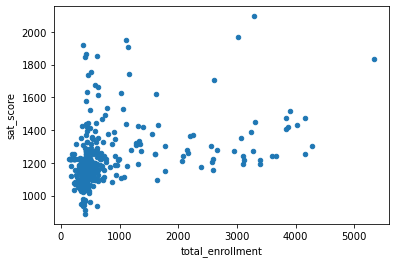

In [529]:
combined.plot.scatter(x='total_enrollment', y='sat_score')
plt.show()

The correlation looks less strong in the scatterplot, however there is an interesting cluster at the bottom left of the graph that could cause the high r-value.

In [530]:
low_enrollment = combined.loc[combined.total_enrollment < 1000]
low_enrollment = low_enrollment.loc[low_enrollment.sat_score < 1000]
low_enrollment['School Name']

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object

In [532]:
low_enrollment.ell_percent

91     90.1
125    86.6
126    87.1
139    88.7
141    79.9
176    92.9
179    86.4
188    83.1
225    91.0
237    30.4
253    94.6
286    91.3
Name: ell_percent, dtype: float64

In [533]:
combined.ell_percent.mean()

13.334986225895316

The above calculation shows that the schools with low enrollment have significantly higher percentages of english learnes which might be the cause for a pseudo correlation here. In clear words: Maybe it"s the percentage fo english learners that correlates with low SAT scores, not the number of students.

<AxesSubplot:xlabel='ell_percent', ylabel='sat_score'>

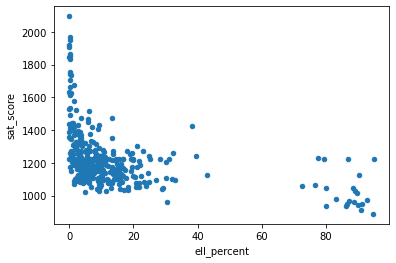

In [534]:
combined.plot.scatter(x='ell_percent', y='sat_score')

To investigate this further, I will aggregate the schools by district.

In [537]:
# group schools by district
districts = combined.groupby('school_dist').agg('mean')
districts.reset_index(inplace=True)
districts

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,Total Grads - % of cohort,...,priority08,priority09,priority10,Community Board,Council District,Census Tract,BIN,BBL,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,71.333333,...,0.0,0.0,0.0,3.000000,1.500000,1106.833333,1.004144e+06,1.003302e+09,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,75.453574,...,0.0,0.0,0.0,4.204005,2.963296,1132.479744,1.103862e+06,1.070438e+09,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,183.384409,74.029937,...,0.0,0.0,0.0,7.500000,6.500000,166.666667,1.034931e+06,1.012833e+09,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,76.257143,...,0.0,0.0,0.0,11.000000,8.000000,2637.000000,1.055874e+06,1.016681e+09,40.793449,-73.943215
4,05,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,143.677419,75.200881,...,0.0,0.0,0.0,9.428571,8.142857,9372.571429,1.063080e+06,1.019721e+09,40.817077,-73.949251
5,06,382.011940,400.565672,382.066269,1164.643881,108.711538,159.715385,105.425000,180.848387,69.811233,...,0.0,0.0,0.0,11.179224,10.823823,2765.702770,1.226037e+06,1.170781e+09,40.848970,-73.932502
6,07,376.461538,380.461538,371.923077,1128.846154,73.703402,112.476331,105.276923,105.605459,67.146628,...,0.0,0.0,0.0,1.692308,12.846154,58.538462,2.032562e+06,2.024050e+09,40.816815,-73.919971
7,08,386.214383,395.542741,377.908005,1159.665129,118.379371,168.020979,144.731818,215.510264,59.514477,...,0.0,0.0,0.0,7.272727,16.727273,67.909091,2.037043e+06,2.036723e+09,40.823803,-73.866087
8,09,373.755970,383.582836,374.633134,1131.971940,71.411538,104.265385,98.470000,113.330645,67.607962,...,0.0,0.0,0.0,3.550000,15.750000,5243.750000,2.022457e+06,2.027913e+09,40.836349,-73.906240
9,10,403.363636,418.000000,400.863636,1222.227273,132.231206,226.914336,191.618182,161.318182,68.656958,...,0.0,0.0,0.0,7.000000,12.227273,1686.045455,1.856268e+06,1.850558e+09,40.870345,-73.898360


In [540]:
districts.sat_score.describe()

count      32.000000
mean     1227.640010
std        95.260356
min      1101.823134
25%      1159.082180
50%      1214.269946
75%      1293.991822
max      1450.500000
Name: sat_score, dtype: float64